## Data Collection

Source for the original csv

In [1]:
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [2]:
#Import the original data
movies_df = pd.read_csv('movie_profit.csv')
movies_df.head(3)


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,174131329.0,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,264246220.0,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,139950708.0,Warner Bros.,PG-13,Adventure


In [3]:
#Create the list of movies to check
movie_list =  movies_df['movie']
len(movie_list)


3401

In [9]:
#Create empty lists for the data to store
from config import api_keys

resultados=[]

url_list=[]

#Create the list of apykeys to ise

key_index = 0
request_count = 0


#The loop to make the requests from the apikey
for movie in movie_list:
 #take the api key from the list according to the key_index value
    my_api_key= api_keys[key_index]
    movie_url = f'http://www.omdbapi.com/?apikey={my_api_key}&t={movie}'
    
    url_list.append(movie_url)

    #make the request & store the information in the dictionary
    response = requests.get(movie_url).json()

    try:
        pelicula = {
            'Title':movie,
            'Director': response['Director'],
            'Writer':response['Writer'],
            'Actors':response['Actors'],
            'Runtime':response['Runtime'],
            'Language':response['Language'],
            'Country':response['Country'],
            'Awards': response['Awards'],
            'Poster': response['Poster'],
            'Metascore': response['Metascore'],
            'imdbRating':response['imdbRating'],
            'imdbVotes':response['imdbVotes'],
            'BoxOffice':response['BoxOffice']
        }
        resultados.append(pelicula)
    except:
        pelicula = {
            'Title':movie,
            'Director': 'Movie not found',
            'Writer':'Movie not found',
            'Actors':'Movie not found',
            'Runtime':'Movie not found',
            'Language':'Movie not found',
            'Country':'Movie not found',
            'Awards': 'Movie not found',
            'Poster': 'Movie not found',
            'Metascore': 'Movie not found',
            'imdbRating':'Movie not found',
            'imdbVotes':'Movie not found',
            'BoxOffice':'Movie not found'
            }
        resultados.append(pelicula)
    
 #add 1 to the request count   
 
    request_count += 1
    
    #when it hits the iteration 990 change to the next apykey and reset the count
    if request_count >= 990:
            key_index += 1
            request_count = 0






{'Title': 'Evan Almighty', 'Director': 'Tom Shadyac', 'Writer': 'Steve Oedekerk, Joel Cohen, Alec Sokolow', 'Actors': 'Steve Carell, Morgan Freeman, Lauren Graham', 'Runtime': '96 min', 'Language': 'English', 'Country': 'United States', 'Awards': '2 wins & 11 nominations', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTUxMTEzODYxMV5BMl5BanBnXkFtZTcwNzQ4ODU0MQ@@._V1_SX300.jpg', 'Metascore': '37', 'imdbRating': '5.4', 'imdbVotes': '152,796', 'BoxOffice': '$100,462,298'}
{'Title': 'Waterworld', 'Director': 'Kevin Reynolds', 'Writer': 'Peter Rader, David Twohy', 'Actors': 'Kevin Costner, Jeanne Tripplehorn, Dennis Hopper', 'Runtime': '177 min', 'Language': 'English', 'Country': 'United States', 'Awards': 'Nominated for 1 Oscar. 6 wins & 9 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BYzE4NTRmMDYtNWYzYi00YmNkLTk4NDEtYjFmMDc4ODQ3ODY2XkEyXkFqcGdeQXVyNTUyMzE4Mzg@._V1_SX300.jpg', 'Metascore': '56', 'imdbRating': '6.3', 'imdbVotes': '205,371', 'BoxOffice': '$88,246

In [7]:
len(url_list)

NameError: name 'url_list' is not defined

In [12]:
results = pd.DataFrame(resultados)

In [1]:
movies_df_complete = movies_df.rename(columns={'movie':'Title'})

NameError: name 'movies_df' is not defined

In [16]:
movies_df_complete = movies_df_complete.merge(results , on='Title')

In [22]:
movies_df_complete.to_csv('Movies_Complete.csv')

## Data Cleaning

In [49]:
movies_df_complete = pd.read_csv('Movies_Complete.csv')
movies_df_complete.head(2)


,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Actors,Runtime,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,"Steve Carell, Morgan Freeman, Lauren Graham",96 min,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,"Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",177 min,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"


In [50]:
movies_df_complete['Title'].value_counts()
movies_df_complete.drop_duplicates(subset='Title',keep='first')
movies_df_complete['Title'].value_counts()

Evan Almighty                    1
Jackie Brown                     1
Time Bandits                     1
Paper Towns                      1
Quarantine                       1
                                ..
Adrift                           1
Mirrors                          1
Queen of the Damned              1
Nanny McPhee and the Big Bang    1
November                         1
Name: Title, Length: 3400, dtype: int64

In [51]:
movies_df_complete = movies_df_complete.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
movies_df_complete.head(2)

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,Actors,Runtime,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,Tom Shadyac,"Steve Oedekerk, Joel Cohen, Alec Sokolow","Steve Carell, Morgan Freeman, Lauren Graham",96 min,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,Kevin Reynolds,"Peter Rader, David Twohy","Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",177 min,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"


In [54]:
movies_df_complete['Revenue'] = movies_df_complete['worldwide_gross']-movies_df_complete['production_budget']

movies_df_complete['%_Revenue'] = (movies_df_complete['Revenue']/movies_df_complete['production_budget'])*100

movies_df_complete['release_date'] = pd.to_datetime(movies_df_complete['release_date'])

movies_df_complete['Year'] = movies_df_complete['release_date'].dt.year

movies_df_complete.head(2)

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Year
0,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,Tom Shadyac,"Steve Oedekerk, Joel Cohen, Alec Sokolow",...,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-868671,-0.496383,2007
1,1995-07-28,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,Kevin Reynolds,"Peter Rader, David Twohy",...,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",89246220,50.997840,1995


## By Year Analysis

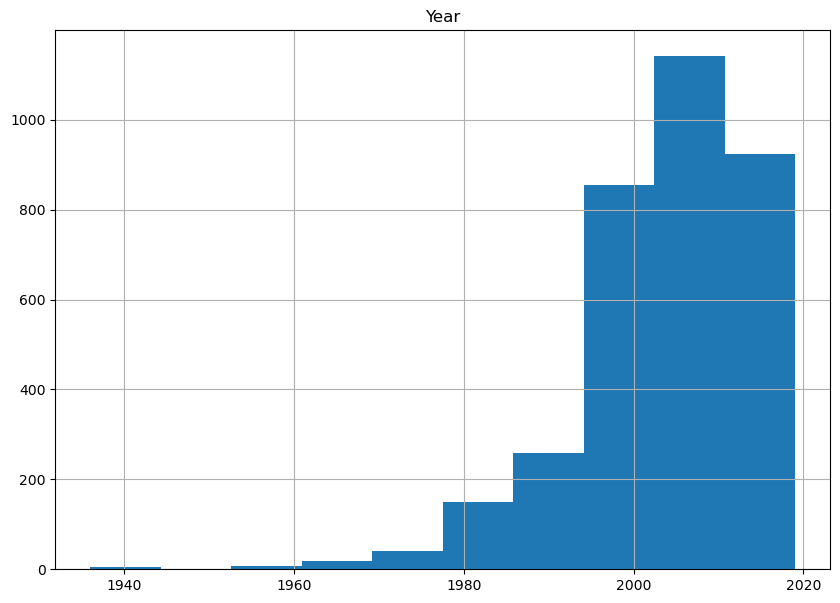

In [55]:
movies_df_complete.hist(column='Year',figsize=(10,7))
plt.show()

In [56]:
movies_df_complete['Year'].sort_values()

3216    1936
2981    1939
3115    1940
3318    1942
3254    1943
        ... 
2476    2018
401     2018
1129    2018
2397    2018
228     2019
Name: Year, Length: 3400, dtype: int64

In [57]:
#Define the time frame for the analysis

lowery=2000
uppery=2019



In [58]:
years_movies_df = movies_df_complete[movies_df_complete['Year'].between(lowery,uppery)]
year_count_filtered = years_movies_df[['Year']].value_counts().reset_index().sort_values(by='Year')
year_count_filtered


,Year,0
10,2000,131
12,2001,128
5,2002,143
7,2003,132
8,2004,132
3,2005,149
0,2006,170
6,2007,139
2,2008,150
13,2009,123


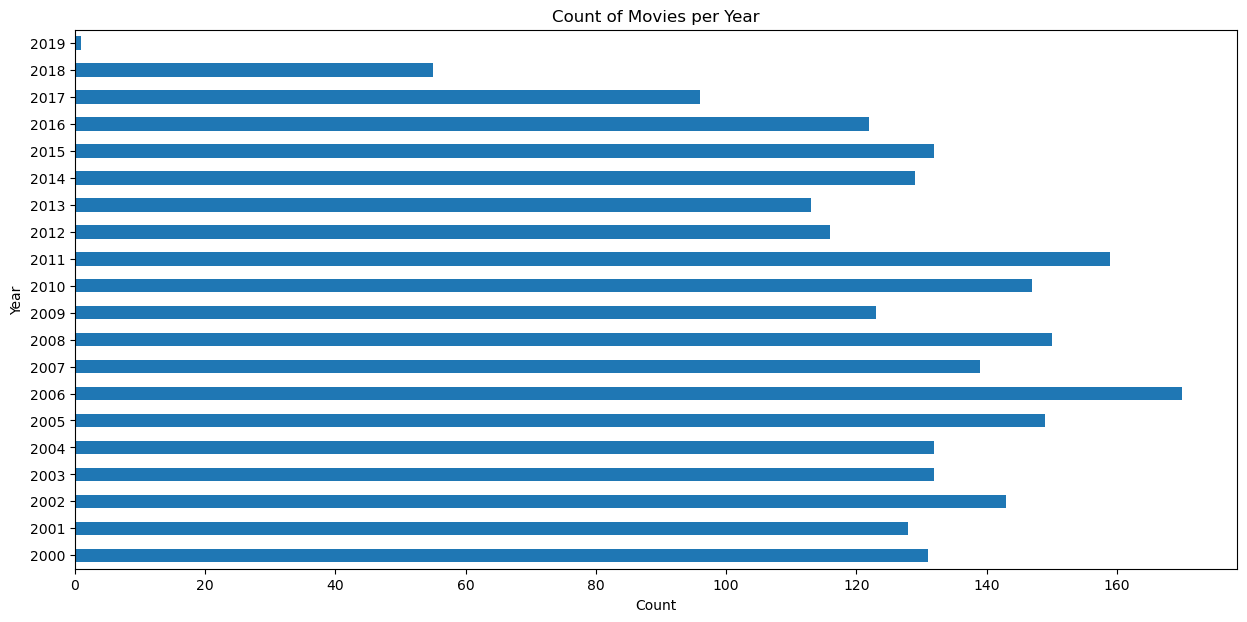

In [59]:
year_count_filtered.plot(kind='barh', x='Year', figsize=(15,7), legend=False)
plt.xlabel('Count')
plt.title("Count of Movies per Year")
plt.show()

## Exploratory Analysis for the Year Analysis

In [60]:
years_movies_df['Month'] = years_movies_df['release_date'].dt.month
print (years_movies_df['Month'])

0        6
2        5
3       12
4        6
5        8
        ..
3393     4
3394     4
3395    10
3396     7
3399     7
Name: Month, Length: 2467, dtype: int64


C:\Users\Republic XIV\AppData\Local\Temp\ipykernel_2044\63869120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_movies_df['Month'] = years_movies_df['release_date'].dt.month


In [61]:
#extracting quarter
years_movies_df['quarter'] = years_movies_df['release_date'].dt.quarter
print(years_movies_df['quarter'])

0       2
2       2
3       4
4       2
5       3
       ..
3393    2
3394    2
3395    4
3396    3
3399    3
Name: quarter, Length: 2467, dtype: int64


C:\Users\Republic XIV\AppData\Local\Temp\ipykernel_2044\804073155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_movies_df['quarter'] = years_movies_df['release_date'].dt.quarter


In [62]:
#Calculating the quarter revenue by year
quarter_revenue = years_movies_df.groupby(['Year', 'quarter'])['Revenue'].mean()
quarter_revenue

Year  quarter
2000  1          2.353347e+07
      2          5.683170e+07
      3          4.291774e+07
      4          4.581810e+07
2001  1          2.918721e+07
                     ...     
2018  1          1.024210e+08
      2          1.670935e+08
      3          1.078697e+08
      4          6.055338e+07
2019  1         -1.000000e+08
Name: Revenue, Length: 77, dtype: float64

In [63]:
#Creating a new dataframe with columns per year
quarter_revenue_df = quarter_revenue.unstack(fill_value=0)
quarter_revenue_df

quarter,1,2,3,4
Year,,,,
2000,2.353347e+07,5.683170e+07,4.291774e+07,4.581810e+07
2001,2.918721e+07,6.948137e+07,4.924913e+07,3.087437e+07
2002,2.898950e+07,6.647172e+07,3.899337e+07,3.317461e+07
2003,2.557764e+07,9.052306e+07,4.079645e+07,5.542577e+07
2004,3.975399e+07,7.886499e+07,3.435182e+07,6.828094e+07
2005,3.685776e+07,7.431848e+07,2.998994e+07,5.199843e+07
2006,4.007588e+07,5.967355e+07,2.314335e+07,5.992369e+07
2007,3.209067e+07,6.282441e+07,4.967082e+07,5.515538e+07
2008,3.467717e+07,7.363662e+07,3.854898e+07,5.435075e+07


In [17]:
quarter_revenue_df.plot(kind='bar', x='Year', y='quarter', figsize=(100,70))

KeyError: 'Year'

## Analysis of genres

In [64]:

years_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 3399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2467 non-null   datetime64[ns]
 1   Title              2467 non-null   object        
 2   production_budget  2467 non-null   int64         
 3   domestic_gross     2467 non-null   int64         
 4   worldwide_gross    2467 non-null   int64         
 5   distributor        2445 non-null   object        
 6   mpaa_rating        2458 non-null   object        
 7   genre              2467 non-null   object        
 8   Director           2458 non-null   object        
 9   Writer             2441 non-null   object        
 10  Actors             2461 non-null   object        
 11  Runtime            2458 non-null   object        
 12  Language           2465 non-null   object        
 13  Country            2465 non-null   object        
 14  Awards  

### EDA for Genre

In [65]:
movies_df_complete[movies_df_complete['production_budget']<=0]

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Year


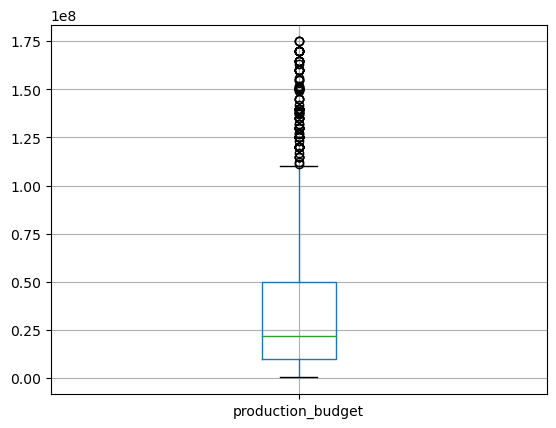

In [66]:
years_movies_df.boxplot(column='production_budget')
plt.show()

In [67]:
years_movies_df[['production_budget']].describe()

,production_budget
count,2.467000e+03
mean,3.584389e+07
std,3.742925e+07
min,2.500000e+05
25%,1.000000e+07
50%,2.200000e+07
75%,5.000000e+07
max,1.750000e+08


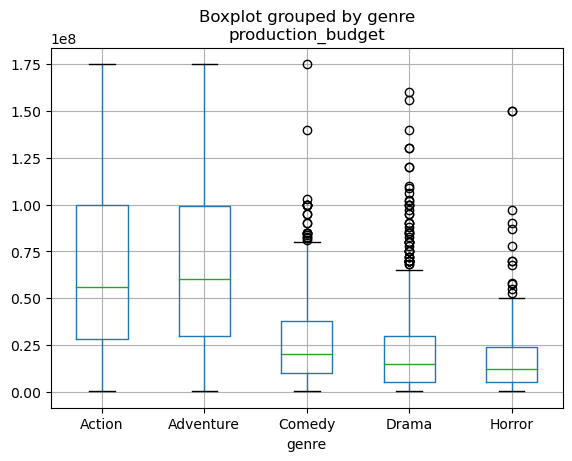

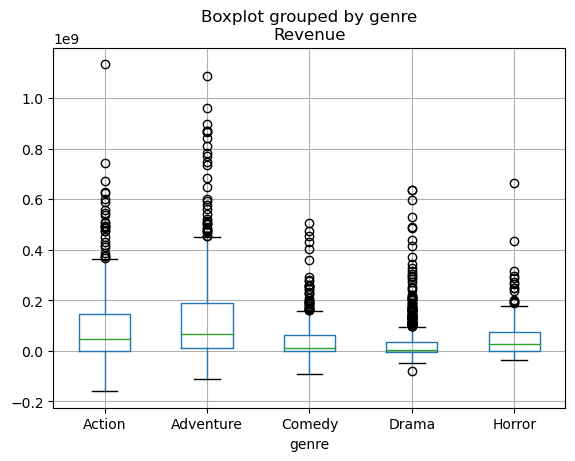

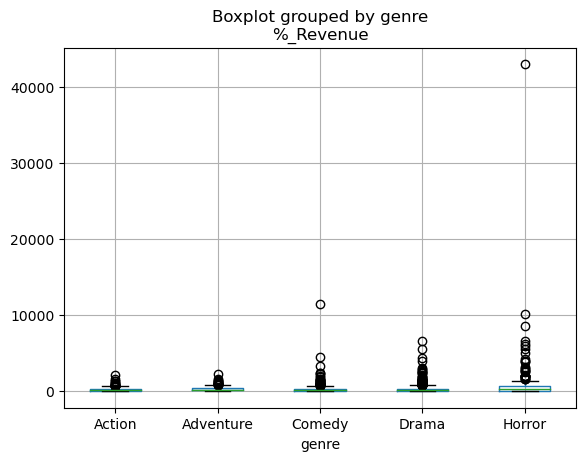

In [68]:
years_movies_df.boxplot(column='production_budget', by='genre')
years_movies_df.boxplot(column='Revenue', by='genre')
years_movies_df.boxplot(column='%_Revenue', by='genre')


plt.show()

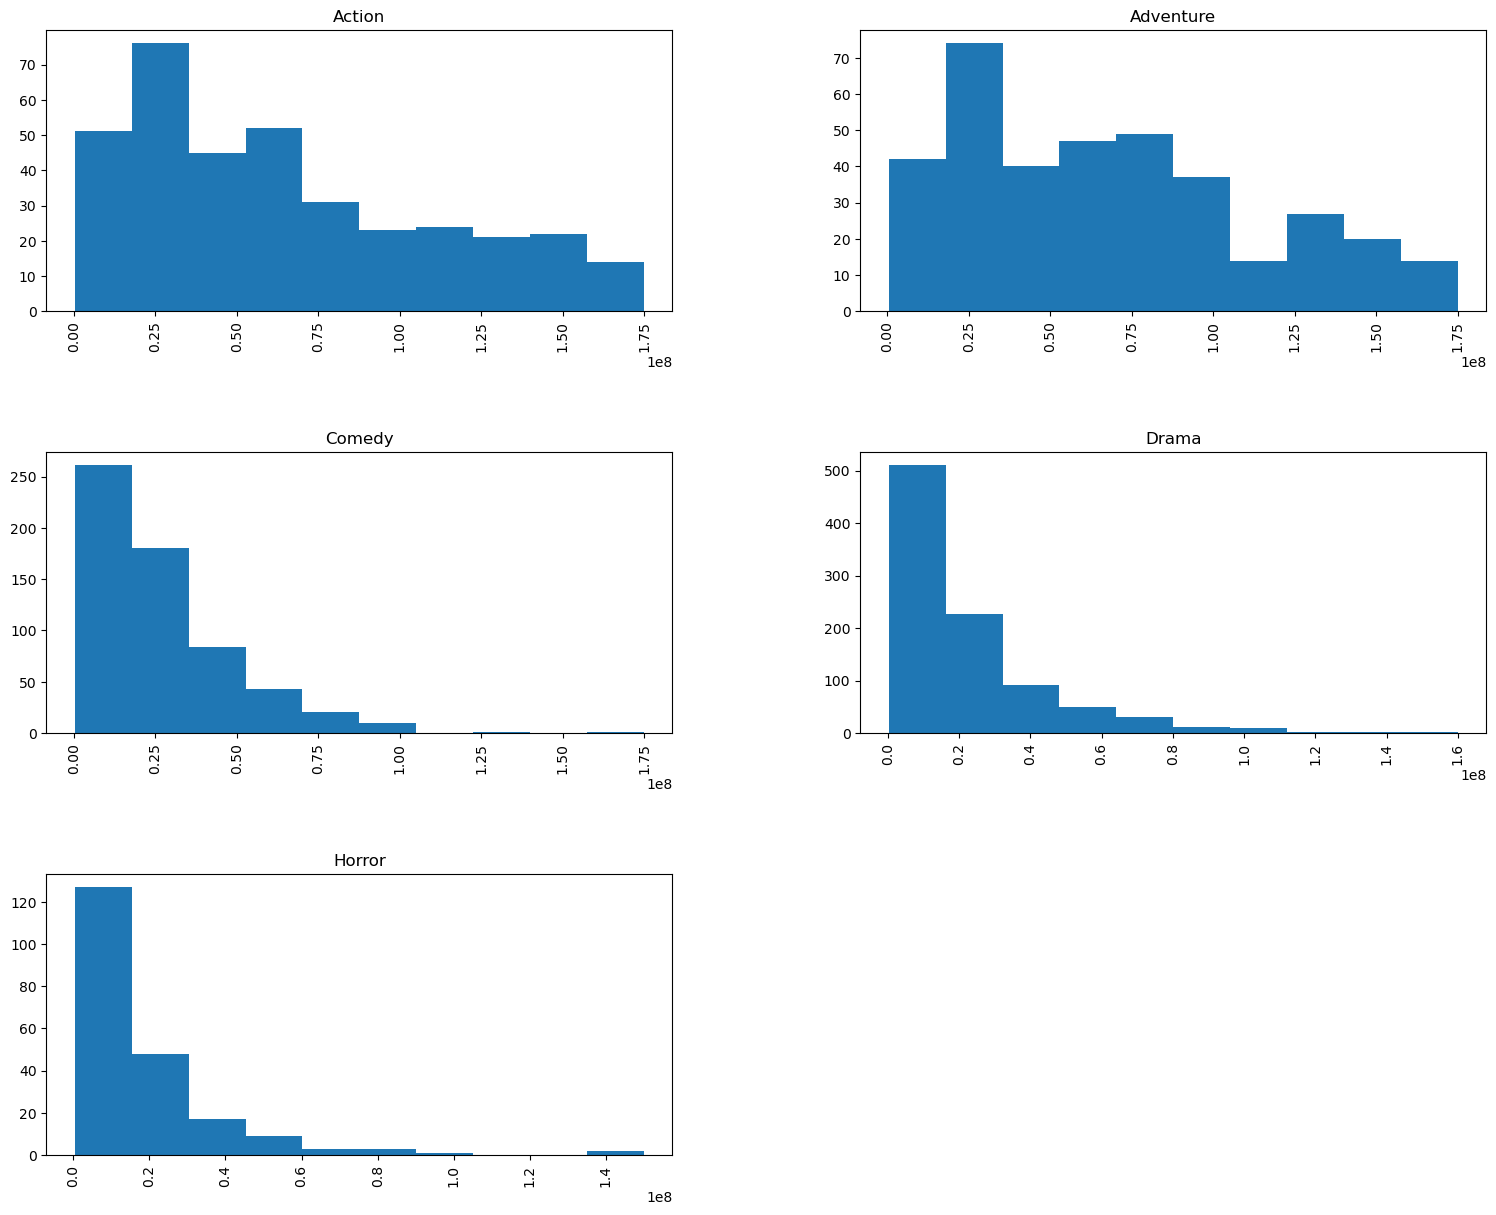

In [69]:
years_movies_df.hist(column='production_budget', by='genre',figsize=(18,15))


plt.show()

In [70]:
years_movies_df.groupby('genre')['production_budget'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,359.0,6.573116e+07,4.676732e+07,250000.0,28000000.0,56000000.0,100000000.0,175000000.0
Adventure,364.0,6.847775e+07,4.522087e+07,400000.0,30000000.0,60000000.0,99250000.0,175000000.0
Comedy,601.0,2.627289e+07,2.327749e+07,300000.0,10000000.0,20000000.0,38000000.0,175000000.0
Drama,933.0,2.167022e+07,2.293860e+07,250000.0,5500000.0,15000000.0,30000000.0,160000000.0
Horror,210.0,1.854845e+07,2.190522e+07,400000.0,5000000.0,12250000.0,23750000.0,150000000.0


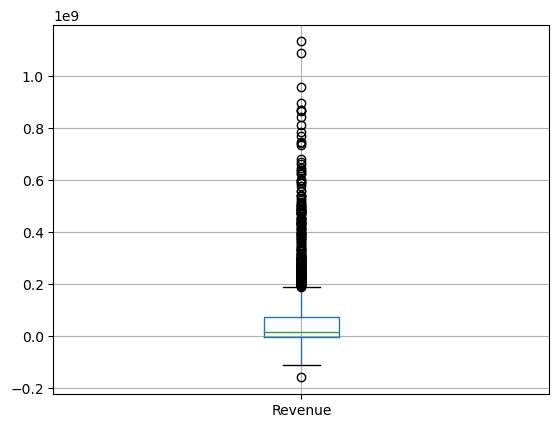

In [71]:
years_movies_df.boxplot(column='Revenue')
plt.show()

In [72]:
years_movies_df[['Revenue']].describe()

,Revenue
count,2.467000e+03
mean,6.106898e+07
std,1.226660e+08
min,-1.600000e+08
25%,-2.322328e+06
50%,1.552791e+07
75%,7.390817e+07
max,1.134866e+09


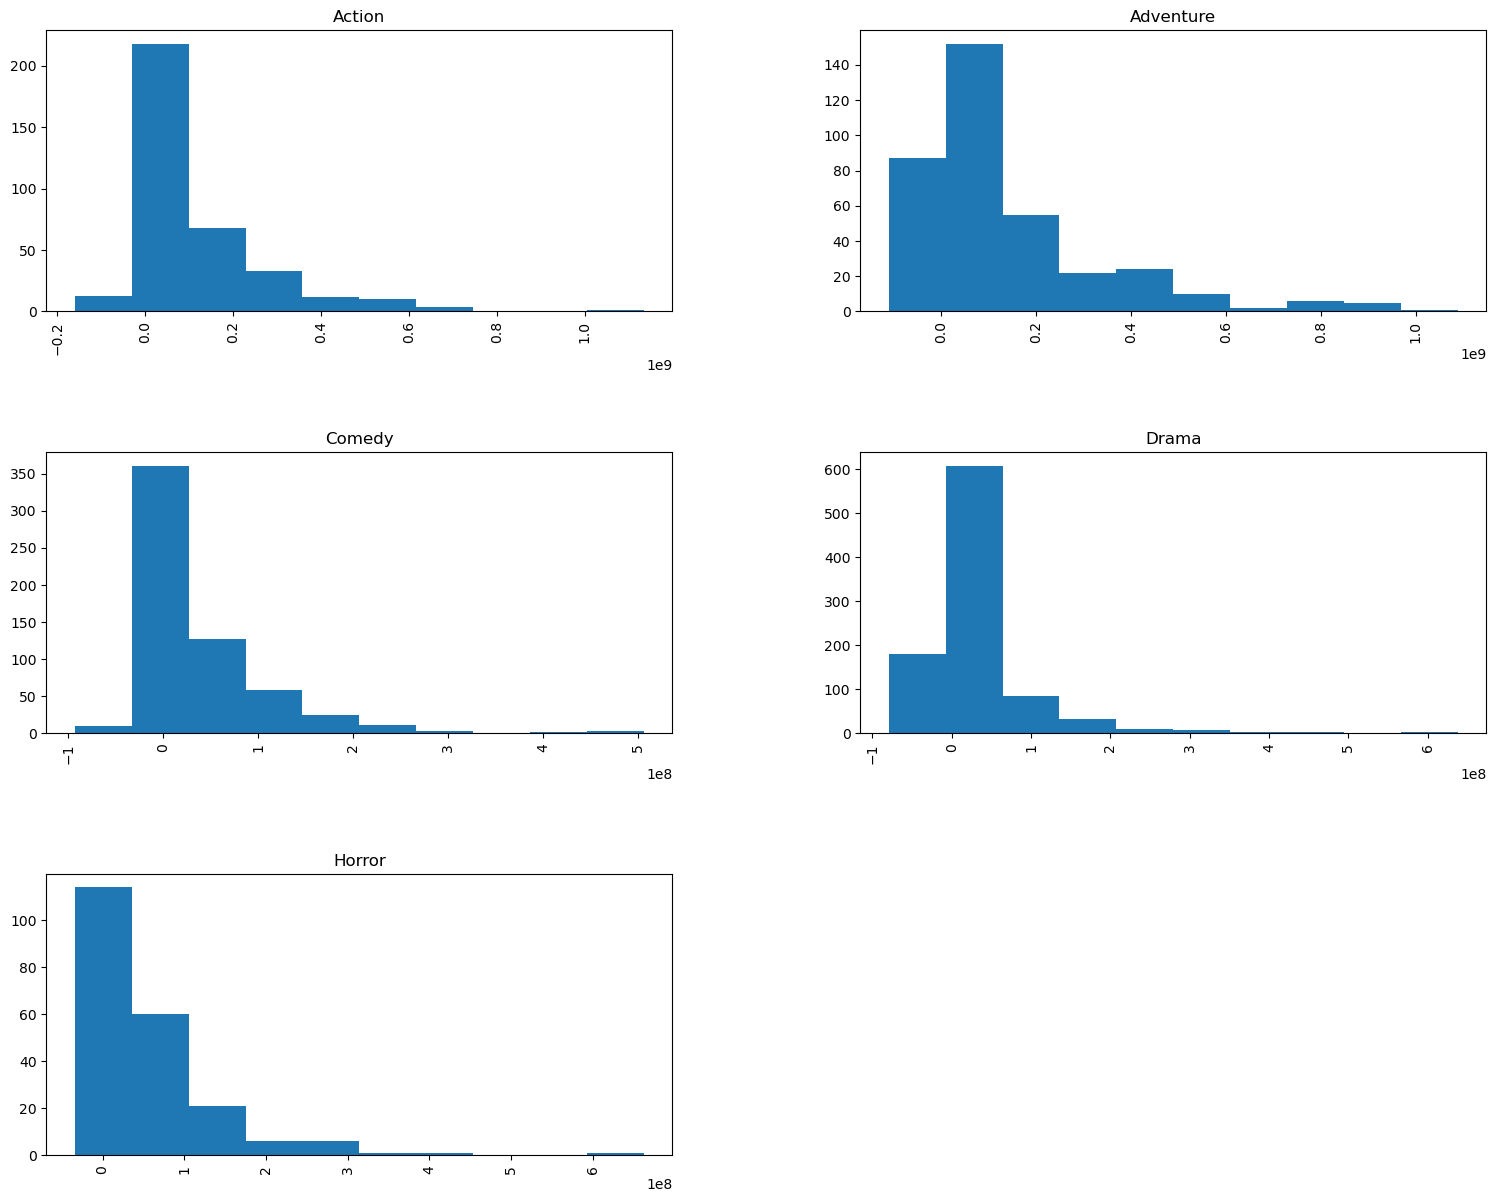

In [73]:
years_movies_df.hist(column='Revenue', by='genre',figsize=(18,15))
plt.show()

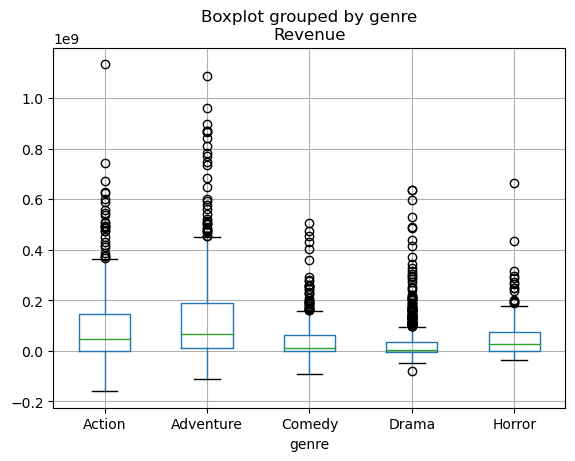

In [74]:
years_movies_df.boxplot(column='Revenue', by='genre')
plt.show()

In [75]:
years_movies_df.groupby('genre')['Revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,359.0,1.035736e+08,1.571160e+08,-160000000.0,-1564092.50,46959582.0,1.448831e+08,1.134866e+09
Adventure,364.0,1.411727e+08,2.001319e+08,-110450242.0,12519150.25,65601378.0,1.889310e+08,1.088782e+09
Comedy,601.0,4.000905e+07,7.225876e+07,-92905005.0,-1964688.00,12504539.0,6.276546e+07,5.064643e+08
Drama,933.0,2.842471e+07,7.240942e+07,-79448583.0,-4432781.00,4206732.0,3.452523e+07,6.381028e+08
Horror,210.0,5.486539e+07,8.348621e+07,-34042459.0,179299.00,28813839.5,7.522983e+07,6.624592e+08


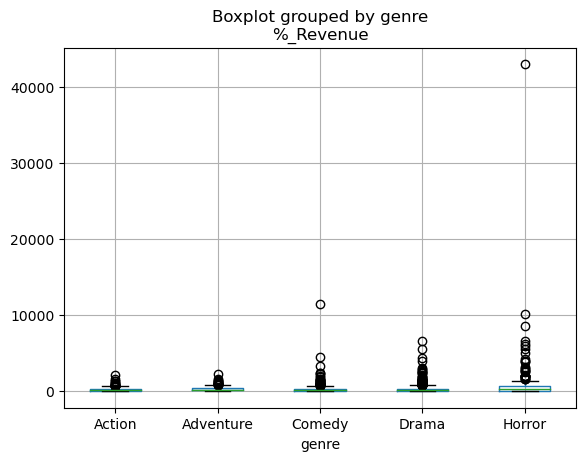

In [76]:
years_movies_df.boxplot(column='%_Revenue', by='genre')
plt.show()

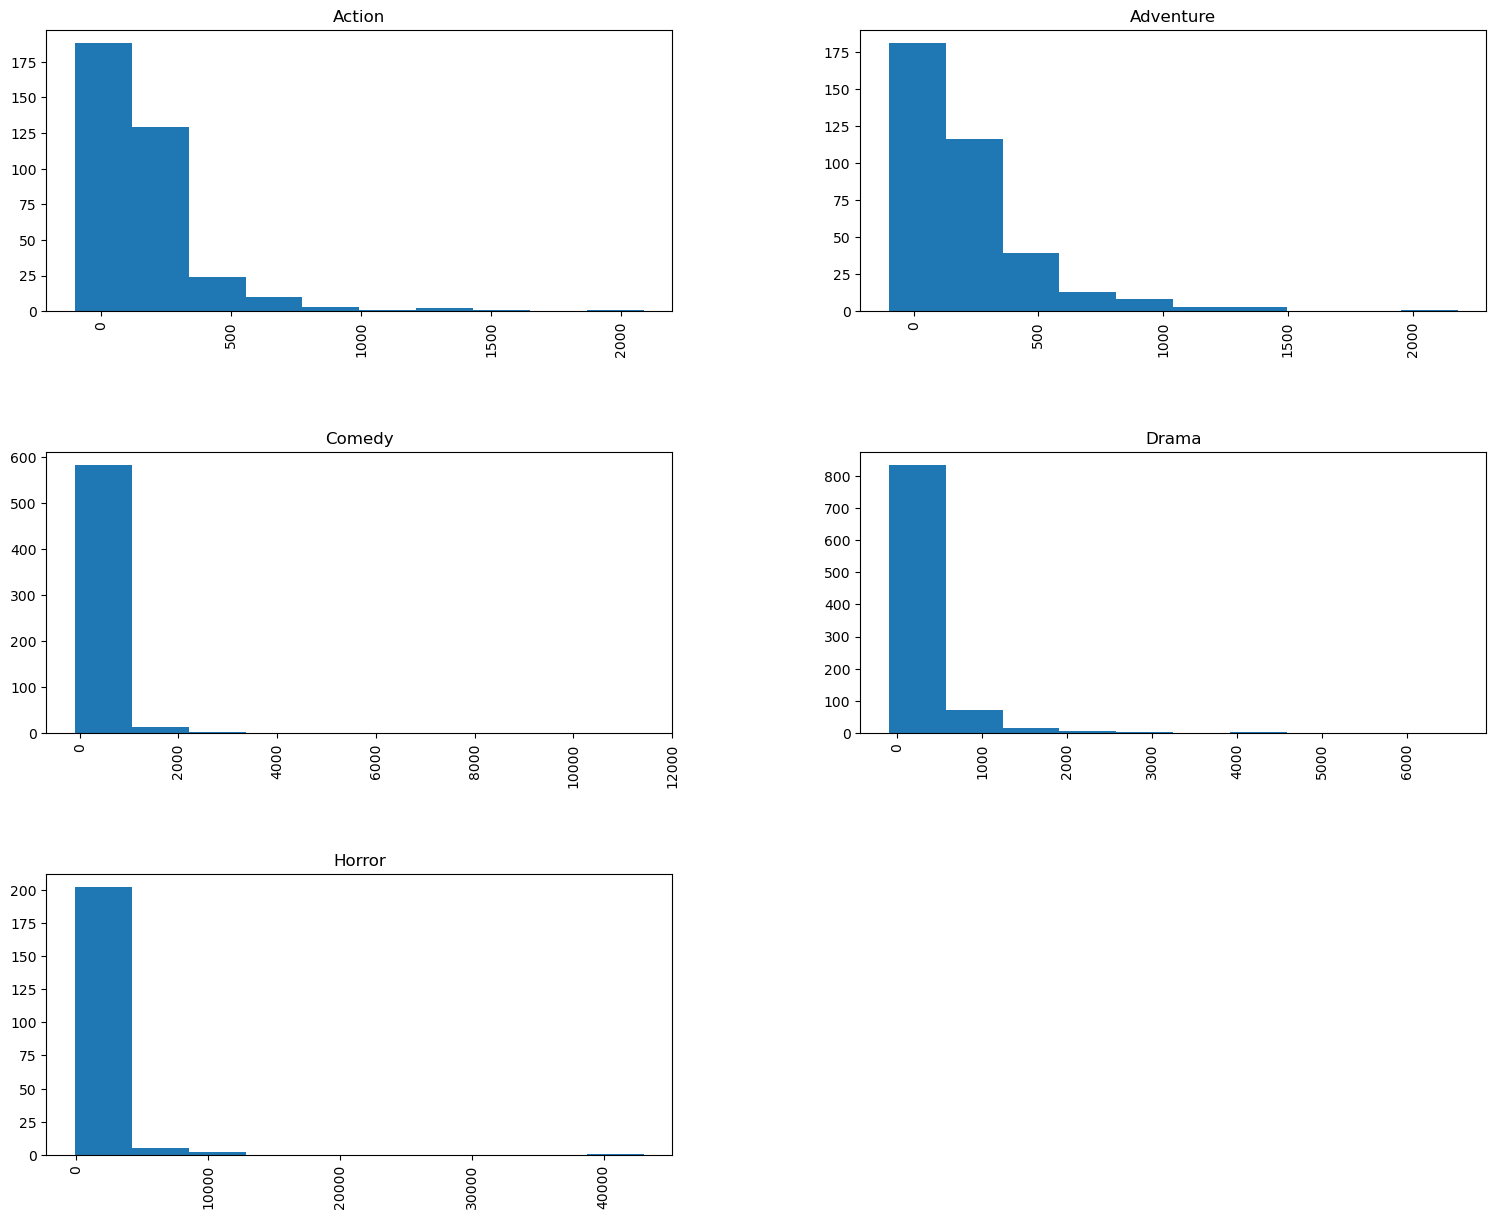

In [77]:
years_movies_df.hist(column='%_Revenue', by='genre',figsize=(18,15))
plt.show()

In [78]:
genre_percent_rev_desc = years_movies_df.groupby('genre')['%_Revenue'].describe()


In [111]:
genre_percent_rev_desc['+1_std']= genre_percent_rev_desc['mean'] + genre_percent_rev_desc['std']
genre_percent_rev_desc['-1_std']= genre_percent_rev_desc['mean'] - genre_percent_rev_desc['std']

genre_percent_rev_desc

,count,mean,std,min,25%,50%,75%,max,+1_std,-1_std
genre,,,,,,,,,,
Action,359.0,148.625901,240.681026,-100.0,-6.897859,105.854887,225.153459,2087.542273,389.306927,-92.055125
Adventure,364.0,200.496681,274.141980,-100.0,29.919387,133.783401,300.519552,2181.737600,474.638662,-73.645299
Comedy,601.0,203.726323,598.210400,-100.0,-20.035704,78.304700,244.371508,11430.678250,801.936723,-394.484077
Drama,933.0,191.345233,508.010987,-100.0,-57.331944,39.598650,235.050533,6594.659400,699.356220,-316.665754
Horror,210.0,881.896535,3252.191779,-100.0,3.947411,176.926528,580.549133,43051.785333,4134.088314,-2370.295244


In [126]:


gen=genre_percent_rev_desc[genre_percent_rev_desc['mean']== genre_percent_rev_desc['mean'].max()].index[0]
gen



'Horror'

In [80]:
years_movies_df[years_movies_df['%_Revenue']==years_movies_df['%_Revenue'].max()]

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,...,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Year,Month,quarter
3363,2009-09-25,Paranormal Activity,450000,107918810,194183034,Paramount Pictures,R,Horror,Oren Peli,Oren Peli,...,https://m.media-amazon.com/images/M/MV5BMjY1Nj...,68,6.3,"250,523","$107,918,810",193733034,43051.785333,2009,9,3


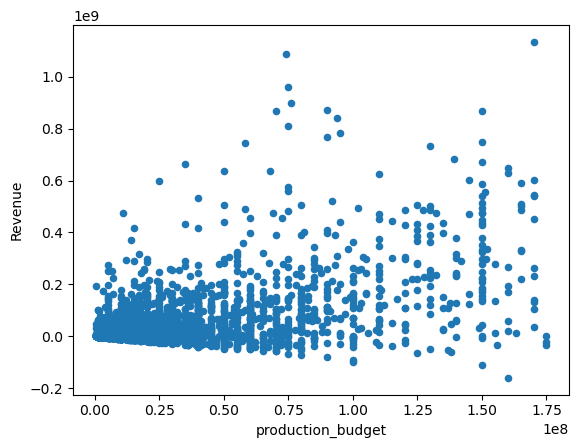

In [81]:
years_movies_df.plot.scatter(x='production_budget', y='Revenue')
plt.show()

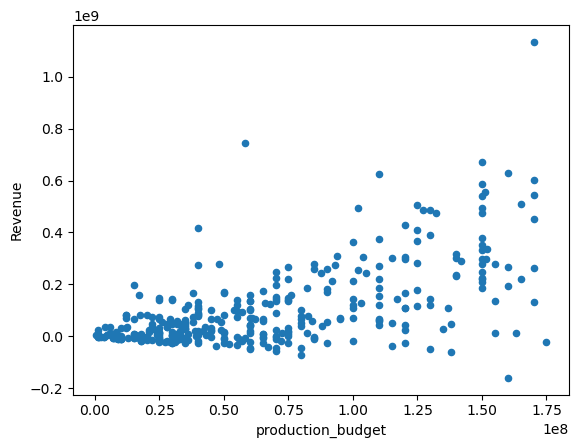

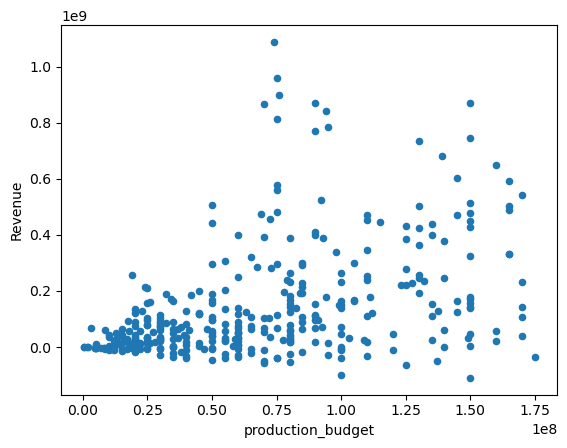

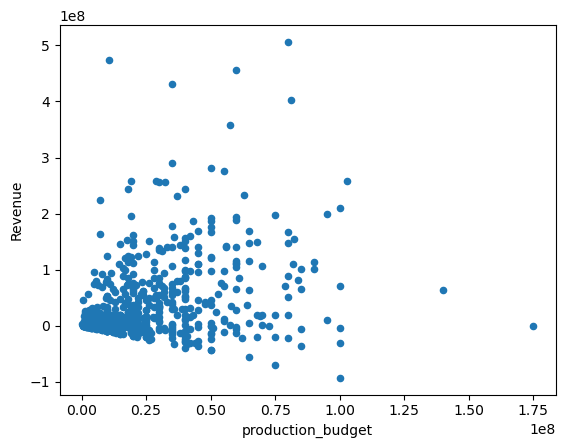

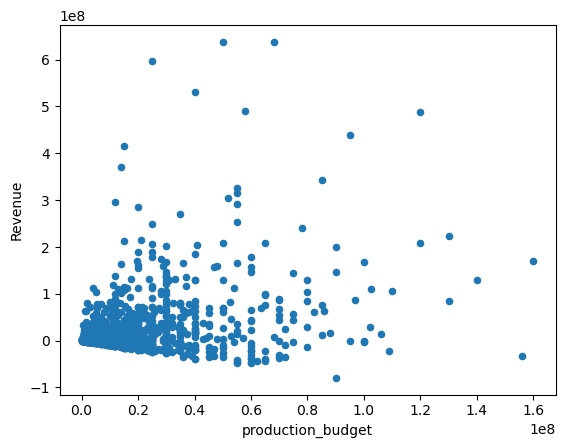

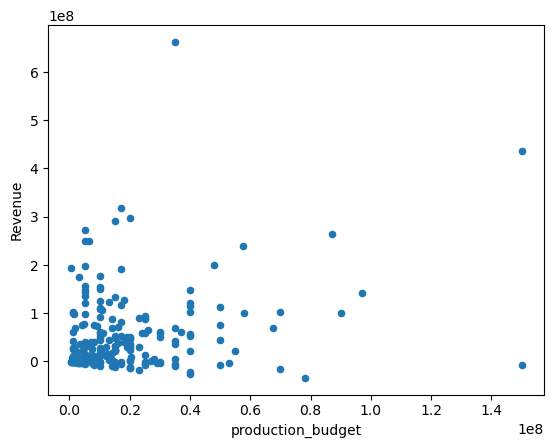

In [82]:
years_movies_df.groupby('genre').plot.scatter(x='production_budget',y='Revenue')
plt.show()

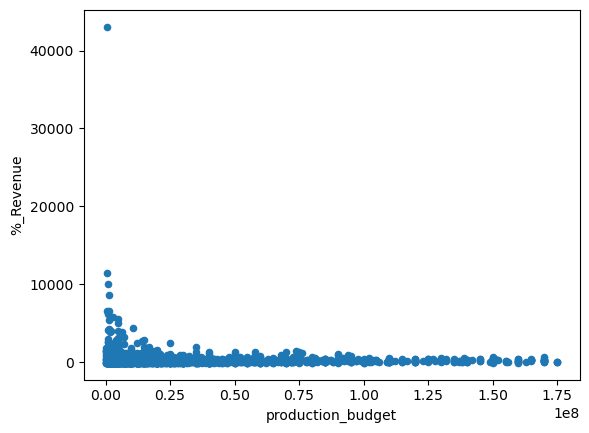

In [83]:
years_movies_df.plot.scatter(x='production_budget', y='%_Revenue')
plt.show()

## By Actor Analysis

In [84]:
years_movies_df.columns

Index(['release_date', 'Title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'distributor', 'mpaa_rating', 'genre', 'Director',
       'Writer', 'Actors', 'Runtime', 'Language', 'Country', 'Awards',
       'Poster', 'Metascore', 'imdbRating', 'imdbVotes', 'BoxOffice',
       'Revenue', '%_Revenue', 'Year', 'Month', 'quarter'],
      dtype='object')

In [88]:

#Add the list of actors in each movie
years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(', ',',')
years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(' ,',',')
years_movies_df['Actors List'] = years_movies_df['Actors'].str.split(',')
years_movies_df['imdbVotes'] = years_movies_df['imdbVotes'].str.replace(',','')
years_movies_df['BoxOffice'] = years_movies_df['BoxOffice'].str.replace(',','')
years_movies_df['BoxOffice'] = years_movies_df['BoxOffice'].str.replace('$','')


#Delete the movies that don't have actors data
movies_df_clean = years_movies_df.loc[years_movies_df['Actors']!='Movie not found']
movies_df_clean = movies_df_clean.loc[movies_df_clean['Actors'].notnull()]
movies_df_clean.columns
movies_df_clean.head(1)


C:\Users\Republic XIV\AppData\Local\Temp\ipykernel_2044\499662288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(', ',',')
C:\Users\Republic XIV\AppData\Local\Temp\ipykernel_2044\499662288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(' ,',',')
C:\Users\Republic XIV\AppData\Local\Temp\ipykernel_2044\499662288.py:4: SettingWithCopyWarning: 
A value is trying to be set

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,...,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Year,Month,quarter,Actors List
0,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,Tom Shadyac,"Steve Oedekerk, Joel Cohen, Alec Sokolow",...,37,5.4,152796,100462298,-868671,-0.496383,2007,6,2,"[Steve Carell, Morgan Freeman, Lauren Graham]"


In [89]:
#Change the values of columns to numeric

movies_df_clean['Metascore']=pd.to_numeric(movies_df_clean['Metascore'])
movies_df_clean['imdbRating']=pd.to_numeric(movies_df_clean['imdbRating'])
movies_df_clean['imdbVotes']=pd.to_numeric(movies_df_clean['imdbVotes'])
movies_df_clean['BoxOffice']=pd.to_numeric(movies_df_clean['BoxOffice'])


In [91]:
#Create a exploded list to analyze each actor
movies_explode_actors=movies_df_clean.explode("Actors List")
movies_explode_actors_grouped=movies_explode_actors.groupby(['Actors List'])

In [92]:
#Create a list of all actors
actors = movies_explode_actors['Actors List'].unique()
actors_metrics =pd.DataFrame()
actors_metrics['Actor']=actors


#Create metrics the metrics of the actors 
av_rev=[]
per_av_rev=[]
movie_count=[]
av_budget=[]
av_metascore=[]
av_imdbscore=[]
genres=[]
av_boxoffice=[]

for actor in actors:
    av_rev.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Revenue'].mean())
    per_av_rev.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['%_Revenue'].mean())
    movie_count.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Title'].count())
    av_budget.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['production_budget'].mean())
    av_metascore.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Metascore'].mean())
    av_imdbscore.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['imdbRating'].mean())
    genres.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['genre'].unique())
    av_boxoffice.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['BoxOffice'].mean())

actors_metrics['Average budget']=av_budget
actors_metrics['Average revenue']=av_budget
actors_metrics['Percentage average revenue']=per_av_rev
actors_metrics['Average boxOffice']=av_boxoffice
actors_metrics['Movie count']=movie_count
actors_metrics['Average metascore']=av_metascore
actors_metrics['Average imdbScore']=av_imdbscore
actors_metrics['Genres']=genres

actors_metrics

,Actor,Average budget,Average revenue,Percentage average revenue,Average boxOffice,Movie count,Average metascore,Average imdbScore,Genres
0,Steve Carell,5.558824e+07,5.558824e+07,396.971195,1.163250e+08,17,62.411765,6.788235,"[Comedy, Adventure, Drama]"
1,Morgan Freeman,5.466667e+07,5.466667e+07,223.547216,7.561692e+07,18,51.777778,6.488889,"[Comedy, Action, Drama]"
2,Lauren Graham,9.750000e+07,9.750000e+07,-38.987914,5.245234e+07,2,47.000000,6.200000,"[Comedy, Drama]"
3,Charlie Hunnam,9.250000e+07,9.250000e+07,-52.200083,2.038112e+07,2,56.000000,6.900000,"[Adventure, Drama]"
4,Astrid Bergès-Frisbey,8.800000e+07,8.800000e+07,-17.394133,1.975577e+07,2,49.000000,7.000000,"[Adventure, Drama]"
...,...,...,...,...,...,...,...,...,...
3002,Jason Tobin,2.500000e+05,2.500000e+05,1423.690400,3.802390e+06,1,67.000000,7.000000,[Drama]
3003,Sung Kang,2.500000e+05,2.500000e+05,1423.690400,3.802390e+06,1,67.000000,7.000000,[Drama]
3004,Rea Lest,2.500000e+05,2.500000e+05,-23.255200,1.908400e+04,1,79.000000,7.200000,[Drama]
3005,Jörgen Liik,2.500000e+05,2.500000e+05,-23.255200,1.908400e+04,1,79.000000,7.200000,[Drama]


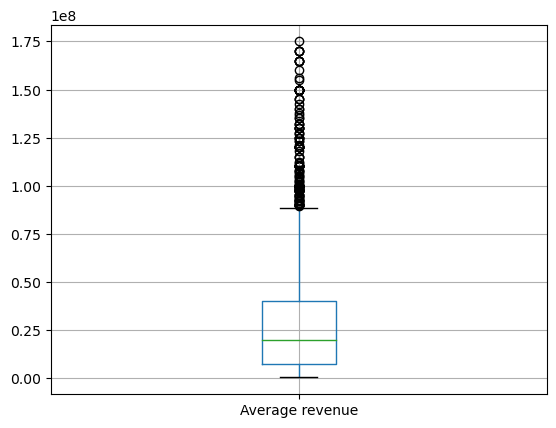

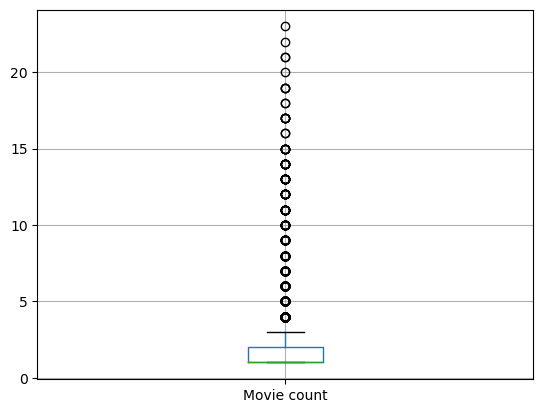

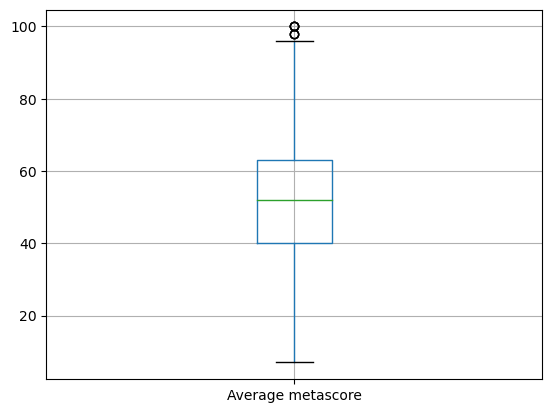

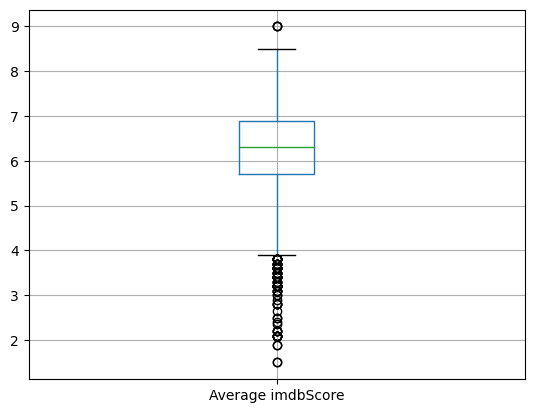

In [93]:
#Plot the behaviour of the metrics
actors_metrics.boxplot(column='Average revenue')
plt.show()
actors_metrics.boxplot(column='Movie count')
plt.show()
actors_metrics.boxplot(column='Average metascore')
plt.show()
actors_metrics.boxplot(column='Average imdbScore')
plt.show()

## Conclusions

In [127]:
#Define the perfect actor
#Genre:
Genre= 'Action'
#Average revenue: in the highest 25% of all actors
q3_av_revenue = actors_metrics['Average revenue'].quantile(0.75)

#Experience (movie count): in the highest 25% of all actors
q3_movie_count = actors_metrics['Movie count'].quantile(0.75)

#Average metascore (critics score): in the highest 25% of all actors
q3_metascore = actors_metrics['Average metascore'].quantile(0.75)

#Average imdbScore (people score): in the highest 25% of all actors
q3_imdbscore = actors_metrics['Average imdbScore'].quantile(0.75)

print(f'Genre: {Genre}')
print(f'Average Revenue: >={q3_av_revenue}')
print(f'Movie count: >={q3_movie_count}')
print(f'Metascore: >={q3_metascore}')
print(f'imdbScore: >={q3_imdbscore}')

Genre: Action
Average Revenue: >=40000000.0
Movie count: >=2.0
Metascore: >=63.0
imdbScore: >=6.9


In [128]:
#Filter the genre:
actors_search = actors_metrics[actors_metrics['Genres'].apply(lambda series: Genre in series)].sort_values(by='Percentage average revenue', ascending=False)

#Filter the Average revenue:
actors_search = actors_search.loc[actors_search['Average revenue']>=q3_av_revenue]

#Filter the experience:
actors_search = actors_search.loc[actors_search['Movie count']>=q3_movie_count]

#Filter the metascore:
actors_search = actors_search.loc[actors_search['Average metascore']>=q3_metascore]

#Filter the imdbScore:
actors_search = actors_search.loc[actors_search['Average imdbScore']>=q3_imdbscore]

actors_search.sort_values(by='Average revenue',ascending=False)

,Actor,Average budget,Average revenue,Percentage average revenue,Average boxOffice,Movie count,Average metascore,Average imdbScore,Genres
127,Mark Rylance,1.450000e+08,1.450000e+08,137.946568,1.226122e+08,2,80.000000,7.050000,"[Action, Adventure]"
22,Andy Serkis,1.210000e+08,1.210000e+08,231.622355,1.254162e+08,5,69.200000,7.200000,"[Adventure, Action]"
234,Evangeline Lilly,1.200000e+08,1.200000e+08,257.321309,1.510586e+08,2,63.000000,7.050000,[Action]
175,Ian McKellen,1.120000e+08,1.120000e+08,158.101866,1.109827e+08,2,69.000000,6.950000,"[Adventure, Action]"
340,Eva Green,1.073333e+08,1.073333e+08,260.810571,1.071415e+08,3,63.666667,7.133333,"[Action, Adventure]"
121,Ken Watanabe,9.700000e+07,9.700000e+07,219.449010,9.730933e+07,4,67.000000,7.775000,"[Action, Drama]"
9,Chris Pratt,9.490000e+07,9.490000e+07,412.207424,2.271579e+08,5,69.800000,7.100000,"[Action, Adventure, Drama, Comedy]"
321,Morena Baccarin,8.400000e+07,8.400000e+07,924.092275,3.438312e+08,2,65.500000,7.800000,[Action]
99,Chris Pine,7.766667e+07,7.766667e+07,131.915119,1.365382e+08,6,64.833333,7.016667,"[Action, Adventure, Drama]"
189,Bryan Cranston,7.750000e+07,7.750000e+07,356.342654,8.929509e+07,2,72.000000,7.450000,"[Adventure, Action]"


In [130]:
#Define the average budget for the movies of the searched actors in the specified genre
mask = movies_explode_actors['Actors List'].apply(lambda x: any(item in x for item in actors_search['Actor']))
movies_searched_actors=movies_explode_actors[mask]
prod_budget= movies_searched_actors.loc[movies_searched_actors['genre']==Genre]['production_budget'].mean()
prod_budget
prod_budget_str=locale.currency(prod_budget, grouping=True)

In [129]:
#Define the expected budget for the movie in the specified genre with the searched actors
mask = movies_explode_actors['Actors List'].apply(lambda x: any(item in x for item in actors_search['Actor']))
movies_searched_actors=movies_explode_actors[mask]
percentage_revenue=movies_searched_actors.loc[movies_searched_actors['genre']==Genre]['%_Revenue'].mean()
percentage_revenue_std= movies_searched_actors.loc[movies_searched_actors['genre']==Genre]['%_Revenue'].std()

expected_revenue=percentage_revenue*prod_budget/100
expected_revenue_str=locale.currency(expected_revenue, grouping=True)

print(f'Prduction budget:{prod_budget_str}')
print(f"Expected percentage revenue: {percentage_revenue:.2f}% +- {percentage_revenue_std:.2f}%")
print(f'Expected total revenue {expected_revenue_str}')

Prduction budget:$28,000,000.00
Expected percentage revenue: 267.68% +- 244.89%
Expected total revenue $74,950,663.29
